In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

2022-11-21 14:08:30.601749: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


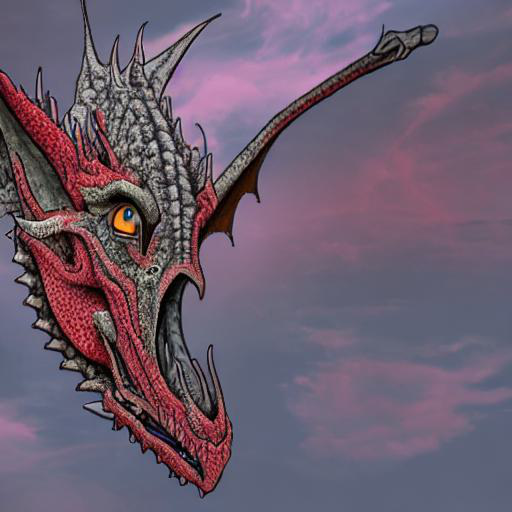

In [2]:
path = './dino_dragon/train/dragon'
name = '00fb9fec-4f3e-454e-b804-7709f98d87fe.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

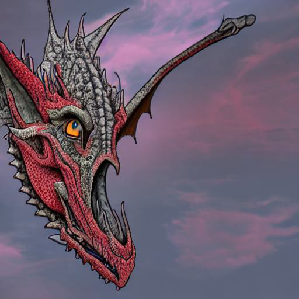

In [3]:
img = load_img(fullname, target_size=(299, 299))
img

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [16]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './dino_dragon/train',
    target_size=(150, 150),
    batch_size=20,
    seed=10,
)

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './dino_dragon/test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=False,
    seed=10
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [6]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [9]:
X, y = next(train_ds)

In [10]:
y[:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [33]:
def make_model(learning_rate=0.002, size_inner=64):
    inputs = keras.Input(shape=(150, 150, 3))
    
    conv2d = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
    pools2d = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2d)
    vectors = keras.layers.Flatten()(pools2d)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(1, activation='sigmoid')(inner)
    model = keras.Model(inputs, outputs)
    
    optimizer = keras.optimizers.SGD(lr=learning_rate, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy(from_logits=False)
    
    
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model


In [34]:
model = make_model()

In [35]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 175232)            0         
                                                                 
 dense_20 (Dense)            (None, 64)                11214912  
                                                                 
 dense_21 (Dense)            (None, 1)                 65        
                                                           

In [19]:
def make_model(learning_rate=0.02, size_inner=64):
    
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters =32,
                                         kernel_size=(3,3),
                                         activation='relu', input_shape =(150,150,3)))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2),))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(size_inner, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    optimizer = keras.optimizers.SGD(lr=learning_rate, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy(name='binary_crossentropy', from_logits=False)

    model.compile(
            optimizer=optimizer,
            loss=loss,
            metrics=['accuracy']
        )
    
    return model

In [70]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './dino_dragon/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

test_gen = ImageDataGenerator(rescale=1./255)

test_ds = test_gen.flow_from_directory(
    './dino_dragon/test',
    target_size=(150, 150),
    batch_size=1,
    class_mode='binary',
    shuffle=True
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [71]:
scores = {}

for lr in [0.002]:
    print(lr)

    model = make_model(learning_rate=lr, size_inner=64)
    history = model.fit(train_ds, epochs=10, validation_data=test_ds)
    scores[lr] = history.history

0.002
Epoch 1/10
80/80 [==============================] - 9s 108ms/step - loss: 0.6385 - accuracy: 0.6230 - val_loss: 0.5540 - val_accuracy: 0.7157
Epoch 2/10
80/80 [==============================] - 9s 106ms/step - loss: 0.4868 - accuracy: 0.7992 - val_loss: 0.4156 - val_accuracy: 0.8350
Epoch 3/10
80/80 [==============================] - 9s 108ms/step - loss: 0.3851 - accuracy: 0.8419 - val_loss: 0.3672 - val_accuracy: 0.8503
Epoch 4/10
80/80 [==============================] - 9s 108ms/step - loss: 0.3466 - accuracy: 0.8614 - val_loss: 0.3311 - val_accuracy: 0.8655
Epoch 5/10
80/80 [==============================] - 9s 108ms/step - loss: 0.3172 - accuracy: 0.8664 - val_loss: 0.3691 - val_accuracy: 0.8173
Epoch 6/10
80/80 [==============================] - 9s 107ms/step - loss: 0.2804 - accuracy: 0.8877 - val_loss: 0.2971 - val_accuracy: 0.8731
Epoch 7/10
80/80 [==============================] - 9s 107ms/step - loss: 0.2502 - accuracy: 0.9090 - val_loss: 0.2937 - val_accuracy: 0.8629


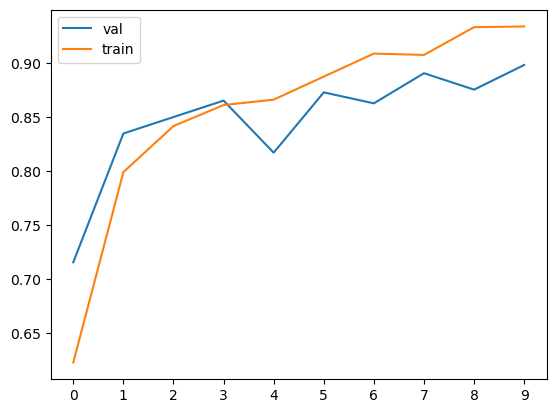

In [72]:
plt.plot(history.history['val_accuracy'], label='val')
plt.plot(history.history['accuracy'], label='train')
plt.xticks(np.arange(10))
plt.legend()

In [73]:
print('median train accuracy:', np.median(scores[0.002]['accuracy']), 'train loss std:', np.std(scores[0.002]['loss']))

median train accuracy: 0.8770388960838318 train loss std: 0.13361978104501274


In [74]:
train_gen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
    )

train_ds = train_gen.flow_from_directory(
        './dino_dragon/train',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',
        shuffle=True,
        seed=5
    )

test_gen = ImageDataGenerator(rescale=1./255)

test_ds = test_gen.flow_from_directory(
        './dino_dragon/test',
        target_size=(150, 150),
        batch_size=1,
        class_mode='binary',
        shuffle=True,
        seed=5,
    )

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [75]:
scores2 = {}

for lr in [0.002]:
    print(lr)

    model2 = make_model(learning_rate=lr, size_inner=64)
    history2 = model2.fit(train_ds, epochs=10, validation_data=test_ds)
    scores2[lr] = history2.history

0.002
Epoch 1/10
80/80 [==============================] - 16s 190ms/step - loss: 0.6904 - accuracy: 0.5577 - val_loss: 0.6634 - val_accuracy: 0.6244
Epoch 2/10
80/80 [==============================] - 15s 189ms/step - loss: 0.6640 - accuracy: 0.6117 - val_loss: 0.6459 - val_accuracy: 0.5431
Epoch 3/10
80/80 [==============================] - 15s 189ms/step - loss: 0.6267 - accuracy: 0.6606 - val_loss: 0.5687 - val_accuracy: 0.7081
Epoch 4/10
80/80 [==============================] - 15s 189ms/step - loss: 0.5831 - accuracy: 0.7127 - val_loss: 0.4943 - val_accuracy: 0.7944
Epoch 5/10
80/80 [==============================] - 15s 189ms/step - loss: 0.5451 - accuracy: 0.7215 - val_loss: 0.5706 - val_accuracy: 0.6650
Epoch 6/10
80/80 [==============================] - 15s 189ms/step - loss: 0.5039 - accuracy: 0.7560 - val_loss: 0.6377 - val_accuracy: 0.6548
Epoch 7/10
80/80 [==============================] - 15s 189ms/step - loss: 0.5141 - accuracy: 0.7591 - val_loss: 0.5426 - val_accuracy: 

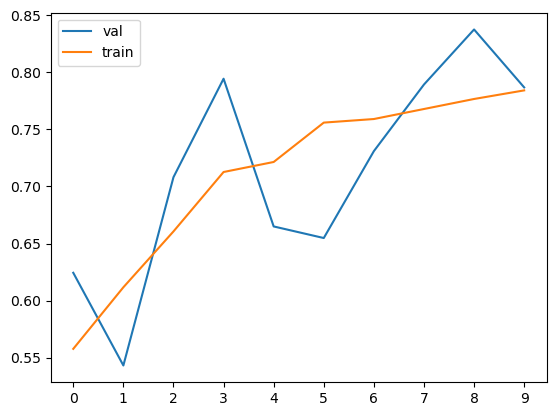

In [76]:
plt.plot(history2.history['val_accuracy'], label='val')
plt.plot(history2.history['accuracy'], label='train')
plt.xticks(np.arange(10))
plt.legend()

In [78]:
print('val loss mean:', 
      np.mean(scores2[0.002]['val_loss']), 
      'mean of val accuracy of 5 last epochs:',
      np.mean(scores2[0.002]['val_accuracy'][5:]))

val loss mean: 0.5354736328125 mean of val accuracy of 5 last epochs: 0.7598984837532043
